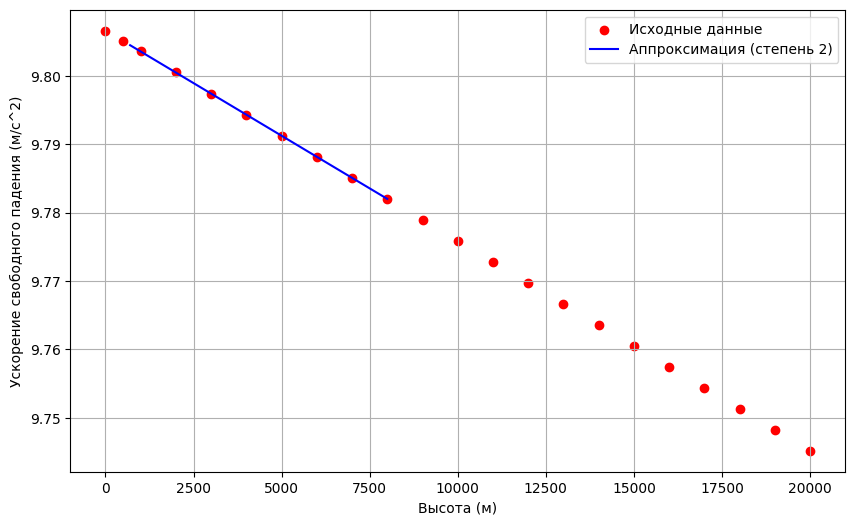

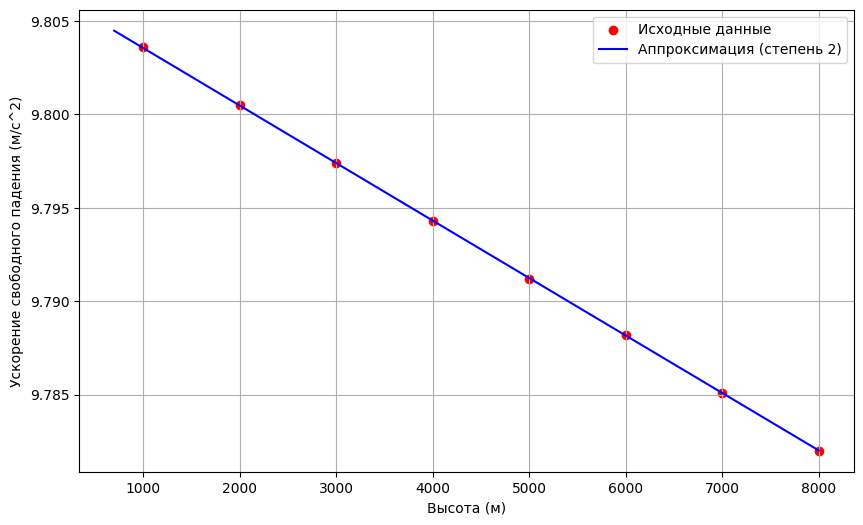

Коэффициенты полинома: [ 5.58847218e-13 -3.08249938e-06  9.80663919e+00]

Значения ошибок:
Ошибка для высоты 1000: 4.275466300995845e-05
Ошибка для высоты 2000: 2.3577505981364766e-05
Ошибка для высоты 3000: 3.2826545179887034e-06
Ошибка для высоты 4000: -1.8129891381946095e-05
Ошибка для высоты 5000: -4.066013171666327e-05
Ошибка для высоты 6000: 3.5691933511827756e-05
Ошибка для высоты 7000: 1.092630430754582e-05
Ошибка для высоты 8000: -1.4957019335071209e-05


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функции, которые вызываются часто вынес сюда
def plot_result(X_table, Y_table, X_range, Y_approximated, degree, y_label):
    """Визуализация результатов"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X_table, Y_table, label='Исходные данные', color='red')
    plt.plot(X_range, Y_approximated, label=f'Аппроксимация (степень {degree})', color='blue')
    plt.xlabel('Высота (м)')    
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_results_close(X_table, Y_table, X_range, Y_approximated, poly_degree, y_label):
    """Визуализация результатов поближе"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X_table[(X_table >= 700) & (X_table <= 8000)], Y_table[(X_table >= 700) & (X_table <= 8000)], label='Исходные данные', color='red')
    plt.plot(X_range, Y_approximated, label=f'Аппроксимация (степень {poly_degree})', color='blue')
    plt.xlabel('Высота (м)')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()
    

def calculate_error(X_range, Y_approximated, data_dict):
    """Считает ошибки аппроксимированых и табличных данных"""
    results = [(x, y) for x, y in zip(X_range, Y_approximated)]
    
    # Посчитаем ошибки определенных ускорений и известных из исходных данных
    print('Значения ошибок:')
    for x, y in results:
        if x in np.arange(1000, 8000 + 1, 1000):
            print(f'Ошибка для высоты {x}: {data_dict[x] - y}')


# Данные по таблице
height_table = np.array([0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]) # Диапазон высот
g_table = np.array([9.8066, 9.8051, 9.8036, 9.8005, 9.7974, 9.7943, 9.7912, 9.7882, 9.7851, 9.7820, 9.7789, 9.7759, 9.7728, 9.7697, 9.7667, 9.7636, 9.7605, 9.7575, 9.7544, 9.7513, 9.7483, 9.7452]) # Соответствующие ускорения свободного падения
data_dict_table = {height: g for height, g in zip(height_table, g_table)} # Создаем словарь

# Аппроксимация данных полиномом
degree = 2 # Выбираем степень полинома
coeffs = np.polyfit(height_table, g_table, degree)

# Создание полинома
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
# height_range = np.linspace(700, 8000, 100) # Будет 100 значений, расположенных через равные интервалы
height_range = np.arange(700, 8000 + 1, 10) # Интервал каждые 10 метров
g_approximated = poly(height_range)

# Визуализация результатов
plot_result(height_table, g_table, height_range, g_approximated, degree, 'Ускорение свободного падения (м/с^2)')

# Визуализация результатов поближе
plot_results_close(height_table, g_table, height_range, g_approximated, degree, 'Ускорение свободного падения (м/с^2)')

# Вывод коэффициентов полинома
print(f'Коэффициенты полинома: {coeffs}\n')

calculate_error(height_range, g_approximated, data_dict_table)
        

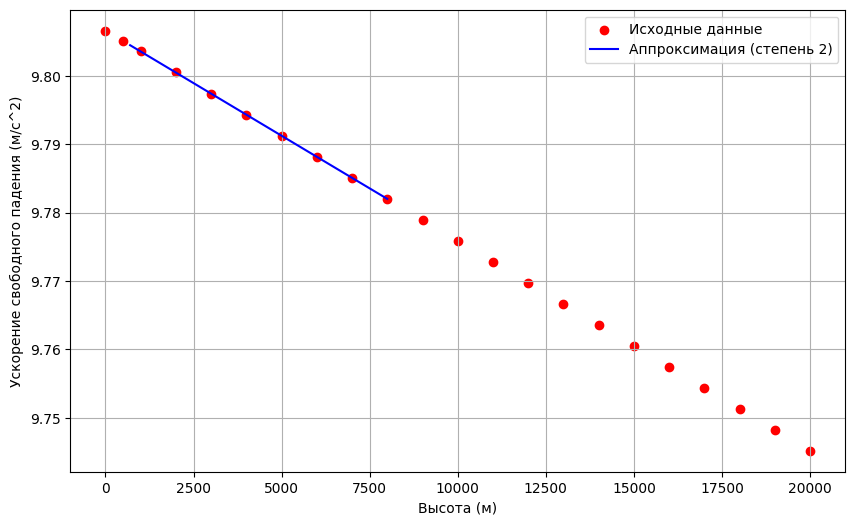

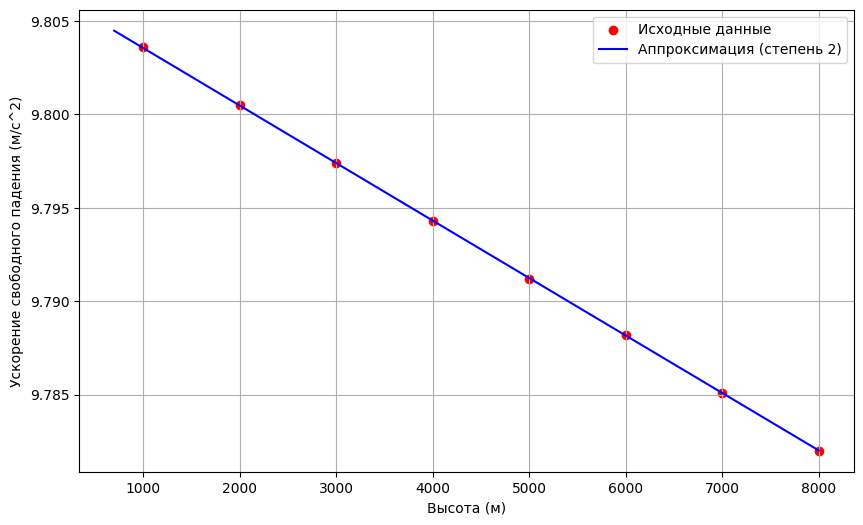

Коэффициенты полинома: [ 5.58847218e-13 -3.08249938e-06  9.80663919e+00]
Значения ошибок:
Ошибка для высоты 1000: 4.275466301351116e-05
Ошибка для высоты 2000: 2.3577505981364766e-05
Ошибка для высоты 3000: 3.2826545144359898e-06
Ошибка для высоты 4000: -1.812989138549881e-05
Ошибка для высоты 5000: -4.06601317237687e-05
Ошибка для высоты 6000: 3.569193350472233e-05
Ошибка для высоты 7000: 1.0926304298664036e-05
Ошибка для высоты 8000: -1.4957019343952993e-05


In [7]:
# Пробую реализовать метод наименьших квадратов для подбора коэффициентов
def least_squares_fit(x, y, degree, num_points=None):
    if num_points is None:
        num_points = len(x)  # Используем все точки по умолчанию
    
    # Выбираем только первые num_points точек для аппроксимации
    x_subset = x[:num_points]
    y_subset = y[:num_points]
    
    # Создаем матрицу X со степенями x_subset
    X = np.vander(x_subset, degree + 1)

    # Решаем уравнение X^T * X * coeffs = X^T * y_subset для coeffs
    # Решение этой системы линейных уравнений производится для получения коэффициентов coeffs.
    coeffs = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_subset))

    return coeffs


height_table = np.array([0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000])
g_table = np.array([9.8066, 9.8051, 9.8036, 9.8005, 9.7974, 9.7943, 9.7912, 9.7882, 9.7851, 9.7820, 9.7789, 9.7759, 9.7728, 9.7697, 9.7667, 9.7636, 9.7605, 9.7575, 9.7544, 9.7513, 9.7483, 9.7452])
data_dict_table = {height: g for height, g in zip(height_table, g_table)} # Создаем словарь

degree = 2  # Выбираем степень полинома

coeffs = least_squares_fit(height_table, g_table, degree)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
# height_range = np.linspace(700, 8000, 100) # Будет 100 значений, расположенных через равные интервалы
height_range = np.arange(700, 8000 + 1, 10) # Интервал каждые 10 метров
g_approximated = poly(height_range)

# Визуализация результатов
plot_result(height_table, g_table, height_range, g_approximated, degree, 'Ускорение свободного падения (м/с^2)')

# Визуализация результатов поближе
plot_results_close(height_table, g_table, height_range, g_approximated, degree, 'Ускорение свободного падения (м/с^2)')

# Вывод коэффициентов полинома
print(f'Коэффициенты полинома: {coeffs}')

calculate_error(height_range, g_approximated, data_dict_table)

[[       0        0        1]
 [  250000      500        1]
 [ 1000000     1000        1]
 [ 4000000     2000        1]
 [ 9000000     3000        1]
 [16000000     4000        1]
 [25000000     5000        1]
 [36000000     6000        1]
 [49000000     7000        1]
 [64000000     8000        1]]


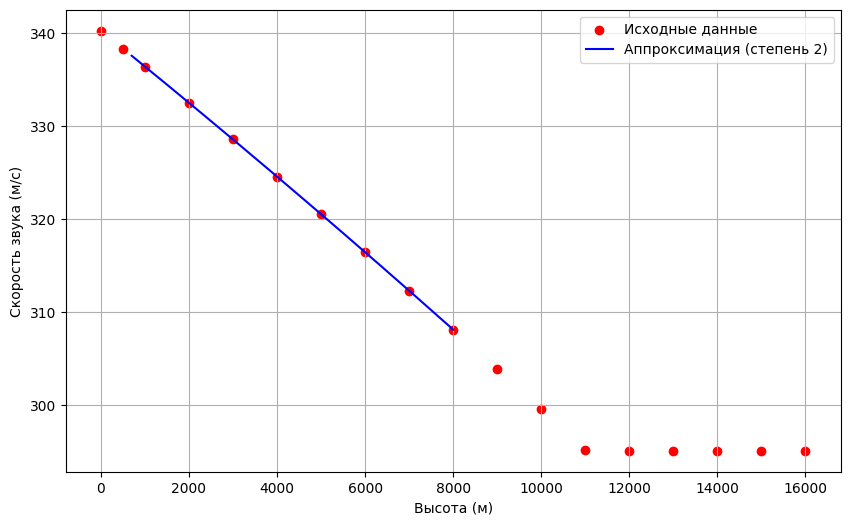

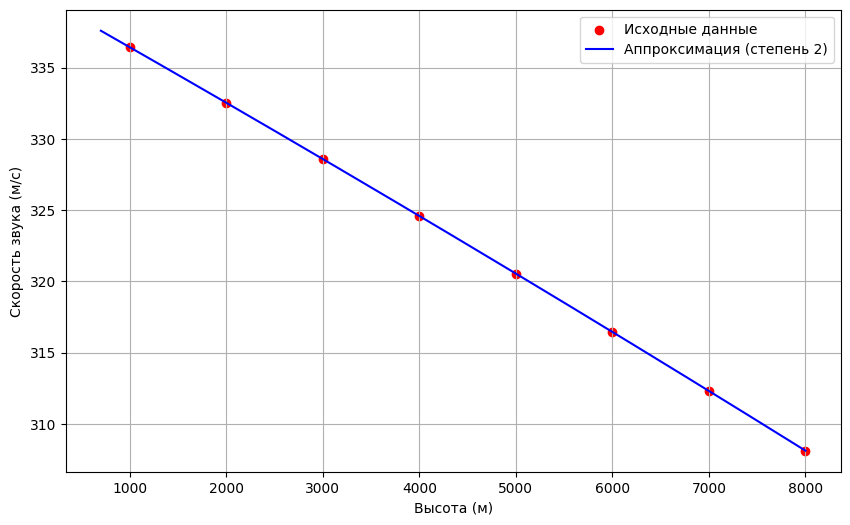

Коэффициенты полинома: [-2.43265270e-08 -3.82778332e-03  3.40289478e+02]
Значения ошибок:
Ошибка для высоты 1000: -0.002368579305368712
Ошибка для высоты 2000: -0.004605680613508412
Ошибка для высоты 3000: -0.0031897278436758825
Ошибка для высоты 4000: -0.00012072099599436115
Ошибка для высоты 5000: 0.002601339929583446
Ошибка для высоты 6000: 0.004976454933000696
Ошибка для высоты 7000: 0.0030046240142382885
Ошибка для высоты 8000: -0.005314152826542795


In [4]:
# Скорость звука от высоты

height_table = np.array([0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000]) # Диапазон высот 
v_table = np.array([340.294, 338.370, 336.435, 332.532, 328.584, 324.589, 320.545, 316.452, 312.306, 308.105, 303.848, 299.532, 295.154, 295.069, 295.069, 295.069, 295.069, 295.065]) # Соответсвующие скорости звука 
data_dict_table = {height: v for height, v in zip(height_table, v_table)} # Создаем словарь

degree = 2  # Выбираем степень полинома

coeffs = least_squares_fit(height_table, v_table, degree, num_points=10) # Будем аппроксимировать исходя из значений первых 10 точек, чтобы не захватывать последние значения

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
# height_range = np.linspace(700, 8000, 100) # Будет 100 значений, расположенных через равные интервалы
height_range = np.arange(700, 8000 + 1, 10) # Интервал каждые 10 метров
v_approximated = poly(height_range)

# Визуализация результатов
plot_result(height_table, v_table, height_range, v_approximated, degree, 'Скорость звука (м/с)')

# Визуализация результатов поближе
plot_results_close(height_table, v_table, height_range, v_approximated, degree, 'Скорость звука (м/с)')

# Вывод коэффициентов полинома
print(f'Коэффициенты полинома: {coeffs}')

calculate_error(height_range, v_approximated, data_dict_table)

[[      0       0       1]
 [ 250000     500       1]
 [1000000    1000       1]
 [4000000    2000       1]
 [9000000    3000       1]]


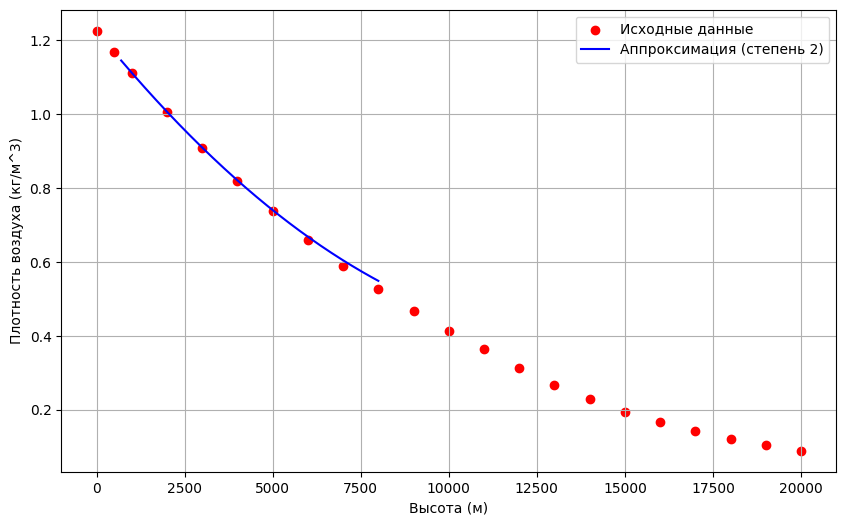

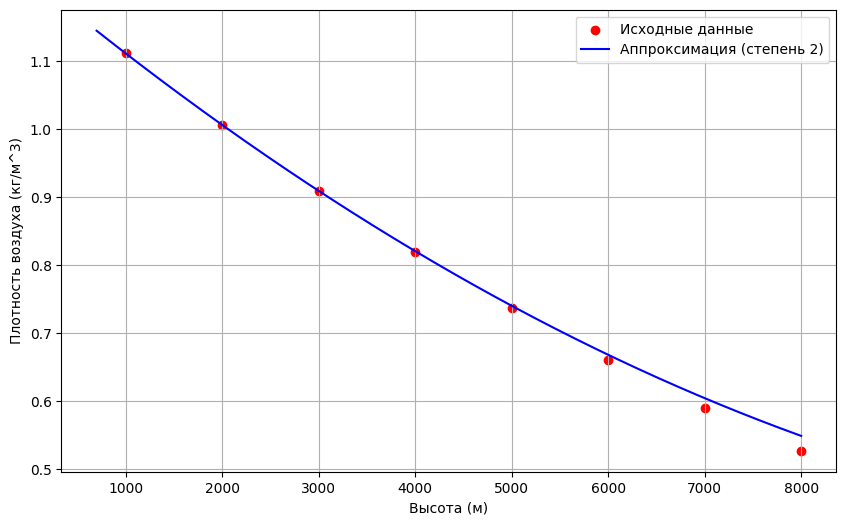

Коэффициенты полинома: [ 4.14972281e-09 -1.17790055e-04  1.22534716e+00]
Значения ошибок:
Ошибка для высоты 1000: -4.6829424307226475e-05
Ошибка для высоты 2000: 0.00018405756929595896
Ошибка для высоты 3000: -7.050106609773898e-05
Ошибка для высоты 4000: -0.0012355053304877739
Ошибка для высоты 5000: -0.003710955223874768
Ошибка для высоты 6000: -0.007885850746258471
Ошибка для высоты 7000: -0.014135191897638899
Ошибка для высоты 8000: -0.021825978678016056


In [5]:
# Плотность воздуха от высоты

height_table = np.array([0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000])
p_table = np.array([1.225500e0, 1.16727e0, 1.11166e0, 1.00655e0, 9.09254e-1, 8.19347e-1, 7.36429e-1, 6.60111e-1, 5.90018e-1, 5.26783e-1, 4.67063e-1, 4.13510e-1, 3.64801e-1, 3.11937e-1, 2.66595e-1,  2.27855e-1, 1.94755e-1, 1.66470e-1, 1.42301e-1, 1.21647e-1, 1.03995e-1, 8.89097e-2]) # Соответсвующие плотности воздуха
data_dict_table = {height: p for height, p in zip(height_table, p_table)} # Создаем словарь

degree = 2  # Выбираем степень полинома

coeffs = least_squares_fit(height_table, p_table, degree, num_points=5)

# Создание полинома на основе коэффициентов
poly = np.poly1d(coeffs)

# Генерация значений для аппроксимации
# height_range = np.linspace(700, 8000, 100) # Будет 100 значений, расположенных через равные интервалы
height_range = np.arange(700, 8000 + 1, 10) # Интервал каждые 10 метров
p_approximated = poly(height_range)

# Визуализация результатов
plot_result(height_table, p_table, height_range, p_approximated, degree, 'Плотность воздуха (кг/м^3)')

# Визуализация результатов поближе
plot_results_close(height_table, p_table, height_range, p_approximated, degree, 'Плотность воздуха (кг/м^3)')

# Вывод коэффициентов полинома
print(f'Коэффициенты полинома: {coeffs}')

calculate_error(height_range, p_approximated, data_dict_table)